In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from ot_dis.wtk.utilities import get_ucr_dataset, krein_svm_grid_search
from ot_dis.wtk import transform_to_dist_matrix, get_kernel_matrix, wtk_distance
import numpy as np
from getData import getData
import time
import numpy as np
import torch

DEBUG:matplotlib:matplotlib data path: c:\Users\Administrator\Documents\WTK-distance\venv\Lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:CONFIGDIR=C:\Users\Administrator\.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:CACHEDIR=C:\Users\Administrator\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\Administrator\.matplotlib\fontlist-v330.json


In [2]:
import torch
import numpy as np
from getData import getData
from ot_dis.kpg import masking_map, masking_map_sequence, masking_map_partial
from arabic_load import get_train_data, get_test_data
from ot_dis.wtk import wtk_distance

# 1. Load data

In [3]:
X_train, y_train, X_test, y_test = getData('BME', '../data/UCR/raw_data/')
xs, xt = X_train[8], X_test[9]

In [4]:
X_train_china, y_train_china, X_test_china, y_test_china = getData('Chinatown', '../data/UCR/raw_data/')
xs_china, xt_china = X_train_china[8], X_test_china[9]

In [5]:
len(X_train), len(X_test), X_train[0].shape

(30, 150, (128,))

In [7]:
X_train_arabic, y_train_arabic = get_train_data()
X_test_arabic, y_test_arabic = get_test_data()
xs_arabic, xt_arabic = X_train_arabic[0], X_test_arabic[1210]

In [8]:
xs_arabic.shape, xt_arabic.shape

((38, 13), (7, 13))

# 2. Metrics proposal

## 2.1. WTK

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Administrator\\Documents\\WTK-distance\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Administrator\\Documents\\WTK-distance\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\

(0.3139994144439697, 0.3253678601524448)

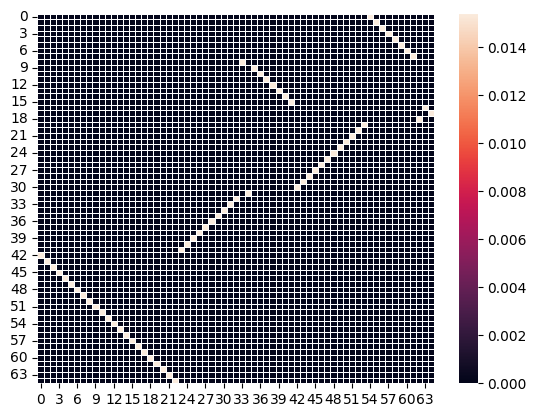

In [6]:
start_time = time.time()
pi_wtk, cost_wtk = wtk_distance(xs, xt, 64, plot=True)
end_time = time.time()
end_time - start_time, cost_wtk

## 2.2. Pure masking

c:\Users\Administrator\Documents\WTK-distance\venv\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Administrator\\Documents\\WTK-distance\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Italic.ttf

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Administrator\\Documents\\WTK-distance\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Administrator\\Documents\\WTK-distance\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Administrator\\Documents\\WTK-distance\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\

(0.18696808815002441, 0.49769166526381736)

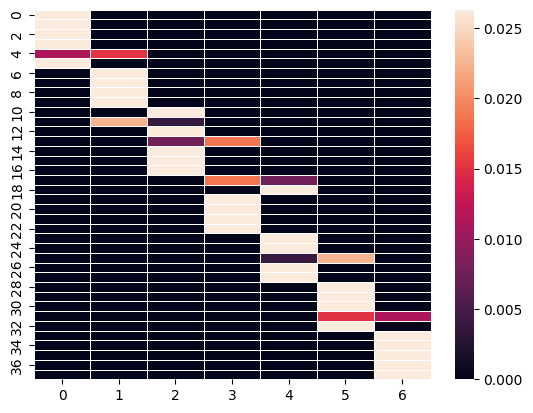

In [8]:
start_time = time.time()
pi_wtk, cost_wtk = masking_map(xs_arabic, xt_arabic, lamb=6,plot=True)
end_time = time.time()
end_time - start_time, cost_wtk

c:\Users\Administrator\Documents\WTK-distance\venv\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x0000029A76440650>


(0.17800402641296387, 0.3382854427599636)

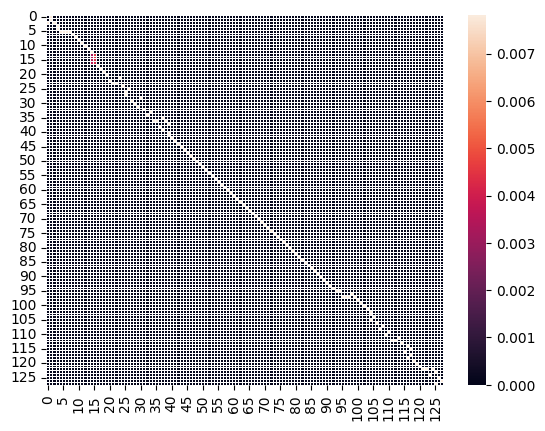

In [35]:
start_time = time.time()
pi_wtk, cost_wtk = masking_map(xs, xt, lamb=3,plot=True)
end_time = time.time()
end_time - start_time, cost_wtk

## 2.3. Partial masking

c:\Users\Administrator\Documents\WTK-distance\venv\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x0000029A758EAD50>


(0.09299969673156738, 23.26309753832218)

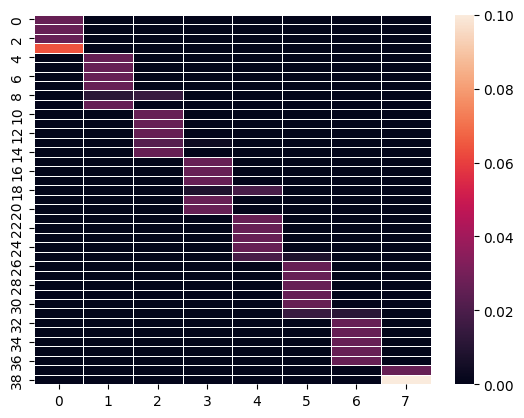

In [10]:
lamb = 4
start_time = time.time()
pi_kpg_sequence, cost_kpg_sequence = masking_map_partial(xs_arabic, xt_arabic, s=0.9, plot=True, lamb=lamb)
end_time = time.time()
end_time - start_time, cost_kpg_sequence

c:\Users\Administrator\Documents\WTK-distance\venv\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x0000029A75A0F9D0>


(0.09399986267089844, 20.10958627091861)

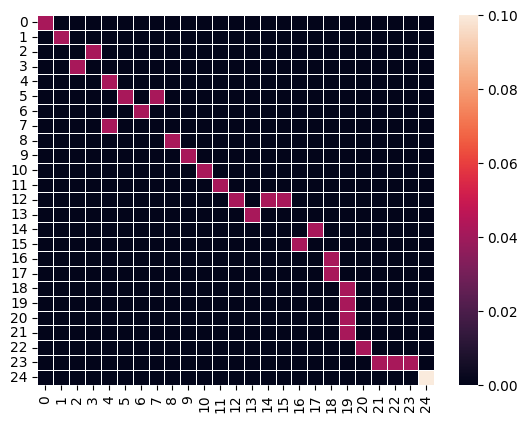

In [11]:
lamb = 4
start_time = time.time()
pi_kpg_sequence, cost_kpg_sequence = masking_map_partial(xs_china, xt_china, s=0.9, plot=True, lamb=lamb)
end_time = time.time()
end_time - start_time, cost_kpg_sequence

## 2.4. Sequence masking

c:\Users\Administrator\Documents\WTK-distance\venv\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000001A0A3F49B10>


(0.1829991340637207, 0.4362377953316014)

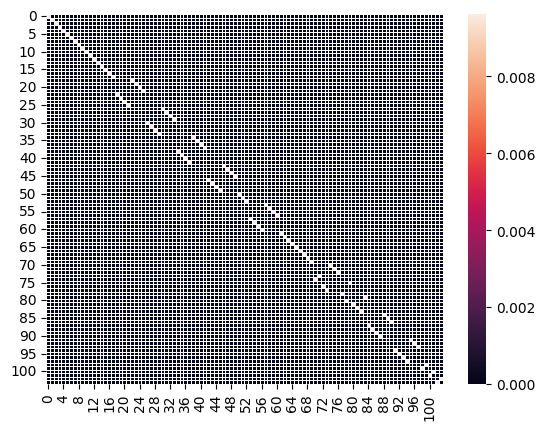

In [12]:
sub_length = 25
lamb = 5
start_time = time.time()
pi_kpg_sequence, cost_kpg_sequence = masking_map_sequence(xs=xs, xt=xt, plot=True, lamb=lamb, sub_length=sub_length)
end_time = time.time()
end_time - start_time, cost_kpg_sequence

c:\Users\Administrator\Documents\WTK-distance\venv\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000001A0A3CDC3D0>


(0.1710066795349121, 0.33052497231092093)

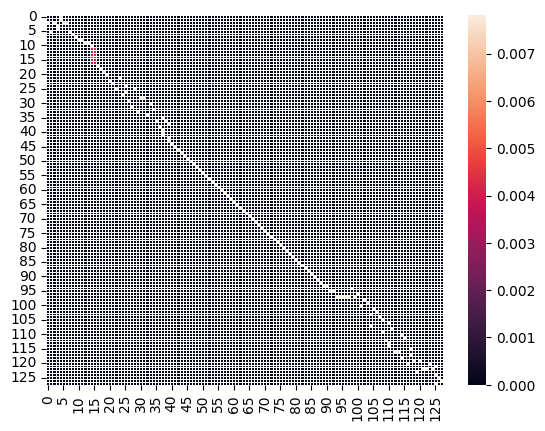

In [11]:
start_time = time.time()
pi_wtk, cost_wtk = masking_map(xs, xt, lamb=5,plot=True)
end_time = time.time()
end_time - start_time, cost_wtk

# Test

In [27]:
def subsequences(time_series, k):
    time_series = np.asarray(time_series)
    n = time_series.size
    shape = (n - k + 1, k)
    strides = time_series.strides * 2

    return np.lib.stride_tricks.as_strided(
        time_series,
        shape=shape,
        strides=strides
    )

In [29]:
sq = subsequences(xs_arabic, 10)
sq, len(xs_china), len(sq)

ValueError: mismatch in length of strides and shape

# 3. Visualize distance matrix difference

In [13]:
import seaborn as sns
def plot_difference(C1, C2):
    C = C1-C2
    sns.heatmap(C, linewidth=0.5)

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x0000020C081553D0>


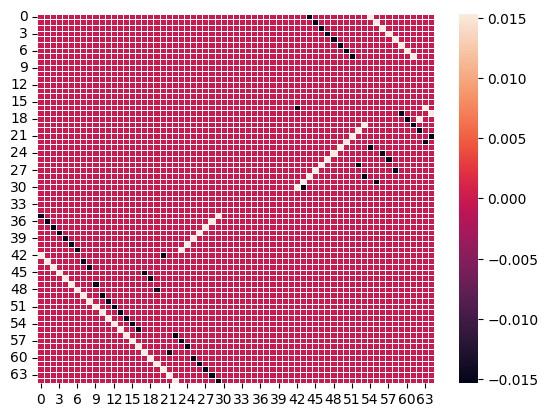

In [16]:
plot_difference(pi_wtk, pi_kpg_sequence)